# 라이브러리 및 데이터 불러오기

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# import function libraries
import numpy as np
import keras
import os, sys ,math, copy
import scipy.io as sio
import tensorflow as tf
from keras.models import Model, Sequential
from keras.engine import Layer, InputSpec
from keras.optimizers import RMSprop, SGD, Adam
from keras import initializers, regularizers, constraints
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, History
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras import backend as K
from keras.utils import np_utils

sys.setrecursionlimit(10000)


train_sample = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/train.csv", header=0, encoding='utf-8')
path = r'/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2'
all_files = glob.glob(path + "/*.csv")

# count the number of pass/fail items

train_sample_np = np.array(train_sample.copy())


# load csv file
li_df = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)    
    li_df.append(df)

In [ ]:
train_sample # 전체 실험 샘플의 데이터 - 각 25번의 실험의 결과

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,aluminum,6,4.0,unworn,yes,yes
1,2,aluminum,20,4.0,unworn,yes,yes
2,3,aluminum,6,3.0,unworn,yes,yes
3,4,aluminum,6,2.5,unworn,no,NaN
4,5,aluminum,20,3.0,unworn,no,NaN
5,6,aluminum,6,4.0,worn,yes,no
6,7,aluminum,20,4.0,worn,no,NaN
7,8,aluminum,20,4.0,worn,yes,no
8,9,aluminum,15,4.0,worn,yes,no
9,10,aluminum,12,4.0,worn,yes,no


In [ ]:
df # 각 실험 샘플의 상세 데이터 - 각 실험 샘플의 condition

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,X_OutputPower,Y_ActualPosition,Y_ActualVelocity,Y_ActualAcceleration,Y_SetPosition,Y_SetVelocity,Y_SetAcceleration,Y_CurrentFeedback,Y_DCBusVoltage,Y_OutputCurrent,Y_OutputVoltage,Y_OutputPower,Z_ActualPosition,Z_ActualVelocity,Z_ActualAcceleration,Z_SetPosition,Z_SetVelocity,Z_SetAcceleration,Z_CurrentFeedback,Z_DCBusVoltage,Z_OutputCurrent,Z_OutputVoltage,S_ActualPosition,S_ActualVelocity,S_ActualAcceleration,S_SetPosition,S_SetVelocity,S_SetAcceleration,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,176.0,10.0500,57.000,176.0,10.00,4.00,-0.620,0.0194,327,0.709,-1.030000e-06,135.50,4.0125,10.250,135.50,4.00,4.0,-0.5610,0.0175,326,1.400,-0.000001,77.85,4.0125,10.250,77.85,4.0,4.0,0,0,0,0,119.0,30.649500,-10.400,119.0,30.65,4.0,0.444,2.760000e-19,327,0.0,1.720000e-06,16,1,2,6,Prep
1,176.5,9.9500,-46.000,176.5,10.00,4.00,-0.779,0.0198,328,1.040,2.280000e-06,135.50,4.0125,10.250,135.50,4.00,4.0,0.1590,0.0156,326,0.144,-0.000001,77.85,3.9875,0.875,77.85,4.0,4.0,0,0,0,0,124.0,30.650500,8.560,124.0,30.65,4.0,-0.400,2.760000e-19,328,0.0,5.770000e-07,16,1,0,6,Prep
2,177.0,10.1500,54.000,177.0,10.00,4.00,0.979,0.0192,327,2.620,1.150000e-06,135.50,3.9875,0.875,135.50,4.00,4.0,-0.5100,0.0277,326,2.180,0.000002,77.85,3.9875,0.875,77.85,4.0,4.0,0,0,0,0,124.0,30.700000,12.025,124.0,30.65,4.0,0.267,2.760000e-19,327,0.0,-3.780000e-07,16,1,0,6,Prep
3,177.5,9.9625,-30.350,177.5,10.00,4.00,-0.779,0.0179,327,1.840,0.000000e+00,135.50,4.0000,4.000,135.50,4.00,4.0,0.0251,0.0250,326,0.642,0.000003,77.85,3.9875,-2.250,77.85,4.0,4.0,0,0,0,0,129.0,30.650500,-23.400,129.0,30.65,4.0,0.443,2.760000e-19,327,0.0,0.000000e+00,16,1,0,6,Prep
4,178.5,9.8375,-77.250,178.5,10.00,4.00,-1.260,0.0164,328,1.350,2.560000e-07,135.50,4.0000,7.125,135.50,4.00,4.0,-0.0582,0.0166,327,1.580,0.000000,77.85,3.9875,4.000,77.85,4.0,4.0,0,0,0,0,129.0,30.599125,-16.069,129.0,30.65,4.0,0.865,2.760000e-19,327,0.0,-4.070000e-06,16,1,0,6,Prep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,154.0,9.9000,19.650,154.0,9.95,6.92,0.555,0.0226,327,2.220,-1.150000e-06,102.35,2.9500,4.000,102.35,3.07,21.9,-1.0200,0.0255,326,2.350,-0.000002,55.20,28.9375,-5.375,55.40,29.0,4.0,0,0,0,0,384.0,30.650875,-0.466,384.0,30.65,4.0,-0.332,2.770000e-19,326,0.0,0.000000e+00,16,1,0,50,End
458,154.5,9.6500,22.750,154.5,10.00,4.00,1.670,0.0268,327,3.000,0.000000e+00,102.30,3.9875,-2.250,102.30,4.00,4.0,-0.2540,0.0228,325,3.800,-0.000004,57.70,29.0000,16.500,57.90,29.0,4.0,0,0,0,0,389.0,30.750500,32.775,389.0,30.65,4.0,-0.518,2.770000e-19,326,0.0,0.000000e+00,16,1,0,50,End
459,155.0,9.8750,-64.600,155.0,10.00,4.00,0.544,0.0274,327,1.510,0.000000e+00,102.30,4.0500,29.000,102.30,4.00,4.0,-1.5300,0.0193,325,1.370,-0.000006,60.15,28.9500,13.400,60.40,29.0,4.0,0,0,0,0,389.0,30.700500,17.300,389.0,30.65,4.0,-1.000,2.770000e-19,327,0.0,-2.050000e-06,16,1,0,50,End
460,155.5,9.9500,-52.125,155.5,10.00,4.00,1.100,0.0275,327,1.900,0.000000e+00,102.30,3.9625,-11.650,102.30,4.00,4.0,-0.0891,0.0169,325,3.720,0.000005,62.70,29.0625,25.875,62.90,29.0,4.0,0,0,0,0,394.0,30.649125,2.686,394.0,30.65,4.0,-0.221,2.770000e-19,326,0.0,1.930000e-06,16,1,0,50,End


In [ ]:
all_files.sort() 
all_files # 실험 순서에 맞게 실험 정렬

['/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_01.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_02.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_03.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_04.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_05.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_06.csv',
 '/content/drive/MyDrive/Colab Notebooks/제조프로젝트/dataset/CNC 비식별화 원본데이터_1209/CNC Virtual Data set _v2/experiment_07.csv',
 '/content/dr

In [ ]:
nb_pass = 0 # 양품 샘플의 개수를 저장할 변수 선언
nb_pass_half = 0 # 공정은 완료했으나 육안검사를 통과하지 못한 샘플의 개수 변수 선언
nb_defective = 0 # 공정을 완료하지 못한 샘플의 개수 변수 선언
for i in range(len(train_sample_np)): # 각 샘플에 대하여
  if train_sample_np[i,5] == 'no': # 공정이 완료되지 않았으면
    nb_defective += 1 # defective 개수에 1개 추가
  if train_sample_np[i,5] == 'yes' and train_sample_np[i,6] == 'no': # 공정이 완료되었지만 육안검사를 통과하지 않았으면
    nb_pass_half +=1 # half 개수에 1개 추가
  if train_sample_np[i,5] == 'yes' and train_sample_np[i,6] == 'yes': # 공정도 완료되었고 육안검사도 통과했다면
    nb_pass +=1 # pass 개수에 1 추가 

print('양품 샘플 개수: ',nb_pass)
print('공정 완료했지만 육안검사를 통과하지 못한 샘플의 개수: ',nb_pass_half)
print('공정을 완료하지 못한 샘플의 개수: ',nb_defective)
print('전체 샘플의 개수: ', nb_pass + nb_defective + nb_pass_half)

양품 샘플 개수:  13
공정 완료했지만 육안검사를 통과하지 못한 샘플의 개수:  6
공정을 완료하지 못한 샘플의 개수:  6
전체 샘플의 개수:  25


# 데이터 전처리

In [ ]:
def tool_condition(input):
    for i in range(len(input)):
        if input[i,4] == 'unworn': # 공구가 마모되지 않았으면 
            input[i,4] = 0
        else:                      # 공구가 마모되었으면
            input[i,4] = 1
    return input

def item_inspection(input): # 샘플의 공정 결과 분류
    for i in range(len(input)):
        if input[i,5] == 'no':      # 공정이 완료되지 않았으면
            input[i,6] = 2
        elif input[i,5] == 'yes' and input[i,6] == 'no': # 공정은 완료되었지만 육안검사를 통과하지 못했으면
            input[i,6] = 1
        elif input[i,5] == 'yes' and input[i,6] == 'yes': # 공정도 완료하고 육안검사도 통과한 양품이면
            input[i,6] = 0
    return input


def machining_process(input): # 공정 상태에 대해서 0~9로 분류
    for i in range(len(input)):
        if input[i,47] == 'Prep':
            input[i,47] = 0
        elif input[i,47] == 'Layer 1 Up':
            input[i,47] = 1
        elif input[i,47] == 'Layer 1 Down':
            input[i,47] = 2
        elif input[i,47] == 'Layer 2 Up':
            input[i,47] = 3
        elif input[i,47] == 'Layer 2 Down':
            input[i,47] = 4
        elif input[i,47] == 'Layer 3 Up':
            input[i,47] = 5
        elif input[i,47] == 'Layer 3 Down':
            input[i,47] = 6
        elif input[i,47] == 'Repositioning':
            input[i,47] = 7
        elif input[i,47] == 'End' or 'end':
            input[i,47] = 8        
        elif input[i,47] == 'Starting':
            input[i,47] = 9
    return input

In [ ]:
# 공구 마모와 공정 결과 데이터 전처리
train_sample_info = np.array(train_sample_np.copy())
train_sample_info = tool_condition(train_sample_info)
train_sample_info = item_inspection(train_sample_info)

# 필요 없는 열 (재질, 순서 삭제)
train_sample_info = np.delete(train_sample_info,5,1)
train_sample_info = np.delete(train_sample_info,0,1)
train_sample_info = np.delete(train_sample_info,0,1)
print(train_sample_info)

[[6 4.0 0 0]
 [20 4.0 0 0]
 [6 3.0 0 0]
 [6 2.5 0 2]
 [20 3.0 0 2]
 [6 4.0 1 1]
 [20 4.0 1 2]
 [20 4.0 1 1]
 [15 4.0 1 1]
 [12 4.0 1 1]
 [3 4.0 0 0]
 [3 3.0 0 0]
 [3 4.0 1 0]
 [3 3.0 1 0]
 [6 3.0 1 0]
 [20 3.0 1 2]
 [3 2.5 0 0]
 [3 2.5 1 0]
 [15 4.0 1 1]
 [12 4.0 0 2]
 [3 4.0 0 1]
 [20 3.0 1 0]
 [3 4.0 1 2]
 [3 3.0 0 0]
 [6 2.5 1 0]]


# 학습에 사용할 샘플 데이터 분류

In [ ]:
train_sample_info

array([[6, 4.0, 0, 0],
       [20, 4.0, 0, 0],
       [6, 3.0, 0, 0],
       [6, 2.5, 0, 2],
       [20, 3.0, 0, 2],
       [6, 4.0, 1, 1],
       [20, 4.0, 1, 2],
       [20, 4.0, 1, 1],
       [15, 4.0, 1, 1],
       [12, 4.0, 1, 1],
       [3, 4.0, 0, 0],
       [3, 3.0, 0, 0],
       [3, 4.0, 1, 0],
       [3, 3.0, 1, 0],
       [6, 3.0, 1, 0],
       [20, 3.0, 1, 2],
       [3, 2.5, 0, 0],
       [3, 2.5, 1, 0],
       [15, 4.0, 1, 1],
       [12, 4.0, 0, 2],
       [3, 4.0, 0, 1],
       [20, 3.0, 1, 0],
       [3, 4.0, 1, 2],
       [3, 3.0, 0, 0],
       [6, 2.5, 1, 0]], dtype=object)

In [ ]:
k = 0 # 
li_pass = []
li_pass_half = []
li_fail = []
for file in all_files:
  df= pd.read_csv(file, index_col=None, header = 0)
                                      # 각 실험 파일들을 가져와서
  if train_sample_info[k,3] == 0:     # 공정 결과에 따라
    li_pass.append(df)                # 0 (공정 완료, 육안검사 통과) 에 분류
  elif train_sample_info[k,3] == 1:   # 1 (공정 완료, 육안검사 못 통과)
    li_pass_half.append(df)        
  else :                              # 2 (공정 미완료)
    li_fail.append(df)
  k += 1

# 분류된 상세 데이터들을 취합 (아래로 더해줌, 인덱스 무시 -> array로 바꾸기 위해)
frame01 = pd.concat(li_pass, axis = 0, ignore_index= True)
frame02 = pd.concat(li_pass_half, axis = 0, ignore_index= True)
frame03 = pd.concat(li_fail, axis = 0 , ignore_index= True)
# 상세 데이터를 array로 만듬
data_pass = np.array(frame01.copy())
data_pass_half = np.array(frame02.copy())
data_fail = np.array(frame03.copy())

print('공정완료 및 육안검사 합격한 전체 데이터의 수: ',len(data_pass))
print('공정완료 및 육안검사 불합격한 전체 데이터의 수: ',len(data_pass_half))
print('공정 미완료한 전체 데이터의 수: ',len(data_fail))

공정완료 및 육안검사 합격한 전체 데이터의 수:  22645
공정완료 및 육안검사 불합격한 전체 데이터의 수:  6175
공정 미완료한 전체 데이터의 수:  3228


In [ ]:
# 분류 데이터 사이즈 확인 -> 행:데이터 개수  열:독립변수 개수
print(data_pass.shape)
print(data_pass_half.shape)
print(data_fail.shape)

(22645, 48)
(6175, 48)
(3228, 48)


In [ ]:
# 공정 상태 숫자로 분류
data_pass = machining_process(data_pass)
data_pass_half = machining_process(data_pass_half)
data_fail = machining_process(data_fail)

In [ ]:
# 데이터셋 구성 -> 라벨링 (data_pass:0, data_pass_half,data_fail:1)
data01 = data_pass[0:3228+6175,:] # 양품과 불량품 학습을 균형있게 해야 예측을 학습이 잘됨
data02 = data_pass_half[0:6175,:]
data03 = data_fail[0:3228,:]

data = np.concatenate((data01,data02),axis = 0);
data = np.concatenate((data,data03),axis = 0); # 학습할 데이터: 불량품과 양품이 균일한 분포로 들어간 데이터셋
data_all = data_pass[3228+6175:22645,:] # 학습하고 남은 pass 데이터를 평가 데이터로 쓰기 위해 만들어놓음

print(data)
print(data.shape) # 학습 데이터 
print(data_all.shape) # 평가 데이터

[[202.0 4.0 4.0 ... 0 50 8]
 [202.0 -6.8 -346.0 ... 4 50 0]
 [200.0 -13.8 -2.25 ... 7 50 0]
 ...
 [155.0 9.875 -64.6 ... 0 50 8]
 [155.5 9.95 -52.125 ... 0 50 8]
 [156.0 10.1 76.125 ... 0 50 8]]
(18806, 48)
(13242, 48)


In [ ]:
sc = MinMaxScaler()
X_train = sc.fit_transform(data) # 학습할 데이터셋에 대해서 각 열의 데이터의 최소값과 최대값을 0,1로 두고 나머지 값들을 그 사이 값들로 재조정
X_train = np.array(X_train)
X_test = sc.fit_transform(data_all) # 평가할 데이터셋에 대해서 각 열의 데이터의 최소값과 최대값을 0,1로 두고 나머지 값들을 그 사이 값들로 재조정
X_test = np.array(X_test)

# 데이터 라벨링

In [ ]:
Y_train = np.zeros((len(X_train),1),dtype='int')
Y_test = np.zeros((len(X_test),1),dtype='int')
l = int(Y_train.shape[0]/2)

Y_train[0:l,:] = 0
Y_train[l:l*2,:] = 1

print(Y_train)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


# 학습/검증/평가 데이터 구성

In [ ]:
# 학습 시작전에 학습 데이터를 9:1로 학습데이터와 검증데이터로 랜덤하게 나눠 학습한다.


# AI 모델 구축

In [ ]:
nb_classes = 2      # 학습 데이터셋의 라벨 종류의 개수
batch_size = 1024   # 학습 데이터셋 배치 사이즈
epochs = 300 # 한 번의 epoch는 인공 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함. 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태
lr = 1e-4
# https://jonhyuk0922.tistory.com/129
# 그림으로 설명하기 사진 첨부와 값의 변화에 따라 어떤 영향 미치는지 설명

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = np_utils.to_categorical(Y_train, nb_classes) # 라벨 데이터를 원 핫 인코딩으로 원핫벡터로 표현 
Y_test = np_utils.to_categorical(Y_test, nb_classes)   # 0 -> [1,0]  1 -> [0,1]
                                                       # 차원 맞추기 : 데이터 학습 완료하고 양품확률, 불량품 확률 2차원으로 출력, 손실 값 확인할 때 cross entropy 차원 수 2차원 맞춰주기 위해 사용
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
Y_train

(18806, 48)
(13242, 48)
(18806, 2)
(13242, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# 모델 디자인

https://www.tensorflow.org/guide/keras/sequential_model?hl=ko

In [ ]:
model = Sequential() #  모델은 계층을 선형으로 쌓은 것으로 각 레이어에 정확히 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택
model.add(Dense(128, activation= 'relu', input_dim = 48)) # 노드 수는 128개, 활성함수는 relu, input 차원은 독립변수 개수인 48개  
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu')) # 깊이가 깊어서 sigmoid를 쓰면 0에 수렴할 확률이 있기 때문에 relu 활성함수를 사용하는 것 
model.add(Dropout(0.5))                  # 처음에 지역최소값에 빠져서 
model.add(Dense(512, activation='relu')) # relu 사용 이유와 back-propagation 개념, 언제하는지
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='sigmoid')) # 양품 확률, 불량품 확률 출력하기 위해 확률로 노드2개 -> dense =2 

model_checkpoint = ModelCheckpoint('weight_CNC_binary.mat', monitor='val_acc',save_best_only=True) # val_acc가 개선되었을 때, 가장 best인 가중치 값을 저장 - 매 에폭 종료시 검증 데이터에 대한 정확도를 확인하고 가장 좋은 값을 기록하였을 때의 가중치를 저장한다
opt=Adam(lr)           # 옵티마이저는 빠르고 정확하게 학습하기 위해 방향 설정해주는 건데 Adam에서는 기울기 값과 기울기의 제곱값의 지수이동평균을 활용하여 step변화량을 조절한다.

model.summary()
model.compile(optimizer=opt,loss='binary_crossentropy', # 학습방식 설정 optimizer 은 아담, loss는 이진크로스엔트로피 평가 지표는 정확성
              metrics=['accuracy'])                     # 손실 함수는 데이터를 토대로 산출한 모델의 예측 값과 실제 값과의 차이를 표현하는 지표 -> 모델의 학습 진행상황을 판단
history = History() # 학습 과정 동안의 정확도와 손실도 등을 기록
print('.............................model is defined.............................')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               6272      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
__________

# 모델 훈련

In [ ]:
model.fit(X_train, Y_train, verbose =2, batch_size = batch_size, epochs= epochs, validation_split= 0.1, shuffle= True, callbacks = [history])
# batchsize, epochs, validation_split, shuffle, history
model.save_weights('weight_CNC_binary.mat')


Train on 16925 samples, validate on 1881 samples
Epoch 1/300
 - 1s - loss: 0.6984 - acc: 0.5223 - val_loss: 0.7177 - val_acc: 0.0125
Epoch 2/300
 - 0s - loss: 0.6922 - acc: 0.5383 - val_loss: 0.7159 - val_acc: 0.0013
Epoch 3/300
 - 0s - loss: 0.6900 - acc: 0.5405 - val_loss: 0.7157 - val_acc: 0.0000e+00
Epoch 4/300
 - 0s - loss: 0.6869 - acc: 0.5464 - val_loss: 0.7168 - val_acc: 0.0011
Epoch 5/300
 - 0s - loss: 0.6844 - acc: 0.5503 - val_loss: 0.7207 - val_acc: 0.0218
Epoch 6/300
 - 0s - loss: 0.6789 - acc: 0.5560 - val_loss: 0.7293 - val_acc: 0.1502
Epoch 7/300
 - 0s - loss: 0.6724 - acc: 0.5626 - val_loss: 0.7348 - val_acc: 0.4258
Epoch 8/300
 - 0s - loss: 0.6655 - acc: 0.5700 - val_loss: 0.7378 - val_acc: 0.5362
Epoch 9/300
 - 0s - loss: 0.6565 - acc: 0.5816 - val_loss: 0.7312 - val_acc: 0.6457
Epoch 10/300
 - 0s - loss: 0.6404 - acc: 0.6088 - val_loss: 0.7083 - val_acc: 0.7262
Epoch 11/300
 - 0s - loss: 0.6284 - acc: 0.6362 - val_loss: 0.6632 - val_acc: 0.8187
Epoch 12/300
 - 0s - 

# 결과 분석 및 해석

In [ ]:
 # 데이터 셋 종류와 함께 설명
loss_and_metrics = model.evaluate(X_train, Y_train, batch_size = 32)
print(loss_and_metrics)
loss_and_metrics2 = model.evaluate(X_test, Y_test, batch_size = 32)
print(loss_and_metrics2)

18806/18806 [==============================] - 1s 68us/step
[0.19339895392987808, 0.9565298309050303]
13242/13242 [==============================] - 1s 67us/step
[0.9040804661578079, 0.9039420027186226]


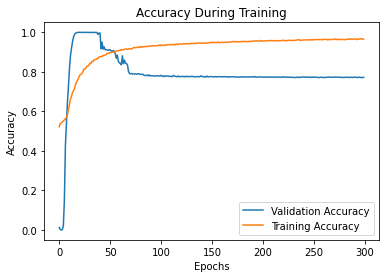

In [ ]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Validation Accuracy', 'Training Accuracy'])
 # 에폭 100 정도 부터 모델 훈련이 수렴하였다.

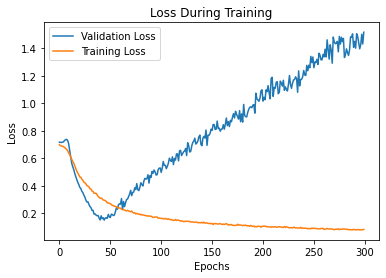

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()